<a href="https://colab.research.google.com/github/minonza/datatrained_projects/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing Important libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Reading csv file....
df=pd.read_csv('/content/drive/MyDrive/wine_quality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [16]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
for i in df.columns.values:
    print('Number of unique values of {} : {}'.format(i,df[i].nunique()))

Number of unique values of fixed acidity : 96
Number of unique values of volatile acidity : 143
Number of unique values of citric acid : 80
Number of unique values of residual sugar : 91
Number of unique values of chlorides : 153
Number of unique values of free sulfur dioxide : 60
Number of unique values of total sulfur dioxide : 144
Number of unique values of density : 436
Number of unique values of pH : 89
Number of unique values of sulphates : 96
Number of unique values of alcohol : 65
Number of unique values of quality : 6


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


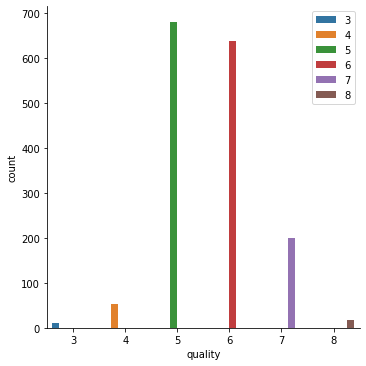

In [20]:
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()

fixed acidity              AxesSubplot(0.125,0.772143;0.352273x0.107857)
volatile acidity        AxesSubplot(0.547727,0.772143;0.352273x0.107857)
citric acid                AxesSubplot(0.125,0.642714;0.352273x0.107857)
residual sugar          AxesSubplot(0.547727,0.642714;0.352273x0.107857)
chlorides                  AxesSubplot(0.125,0.513286;0.352273x0.107857)
free sulfur dioxide     AxesSubplot(0.547727,0.513286;0.352273x0.107857)
total sulfur dioxide       AxesSubplot(0.125,0.383857;0.352273x0.107857)
density                 AxesSubplot(0.547727,0.383857;0.352273x0.107857)
pH                         AxesSubplot(0.125,0.254429;0.352273x0.107857)
sulphates               AxesSubplot(0.547727,0.254429;0.352273x0.107857)
alcohol                       AxesSubplot(0.125,0.125;0.352273x0.107857)
quality                    AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

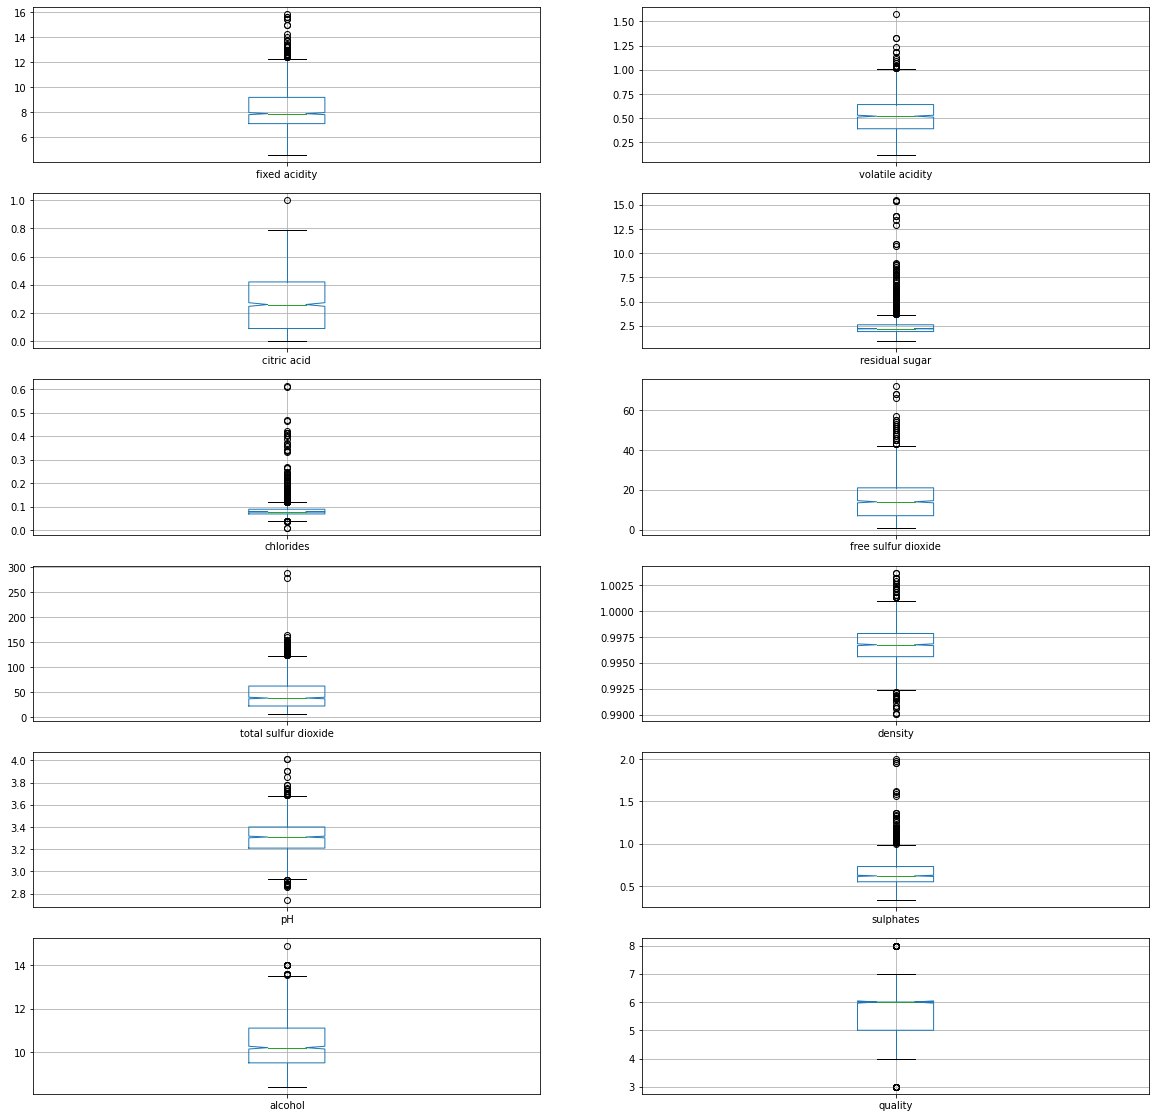

In [21]:
df.plot(kind='box', subplots=True, layout=(6,2),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01005a8990>,
      dtype=object)

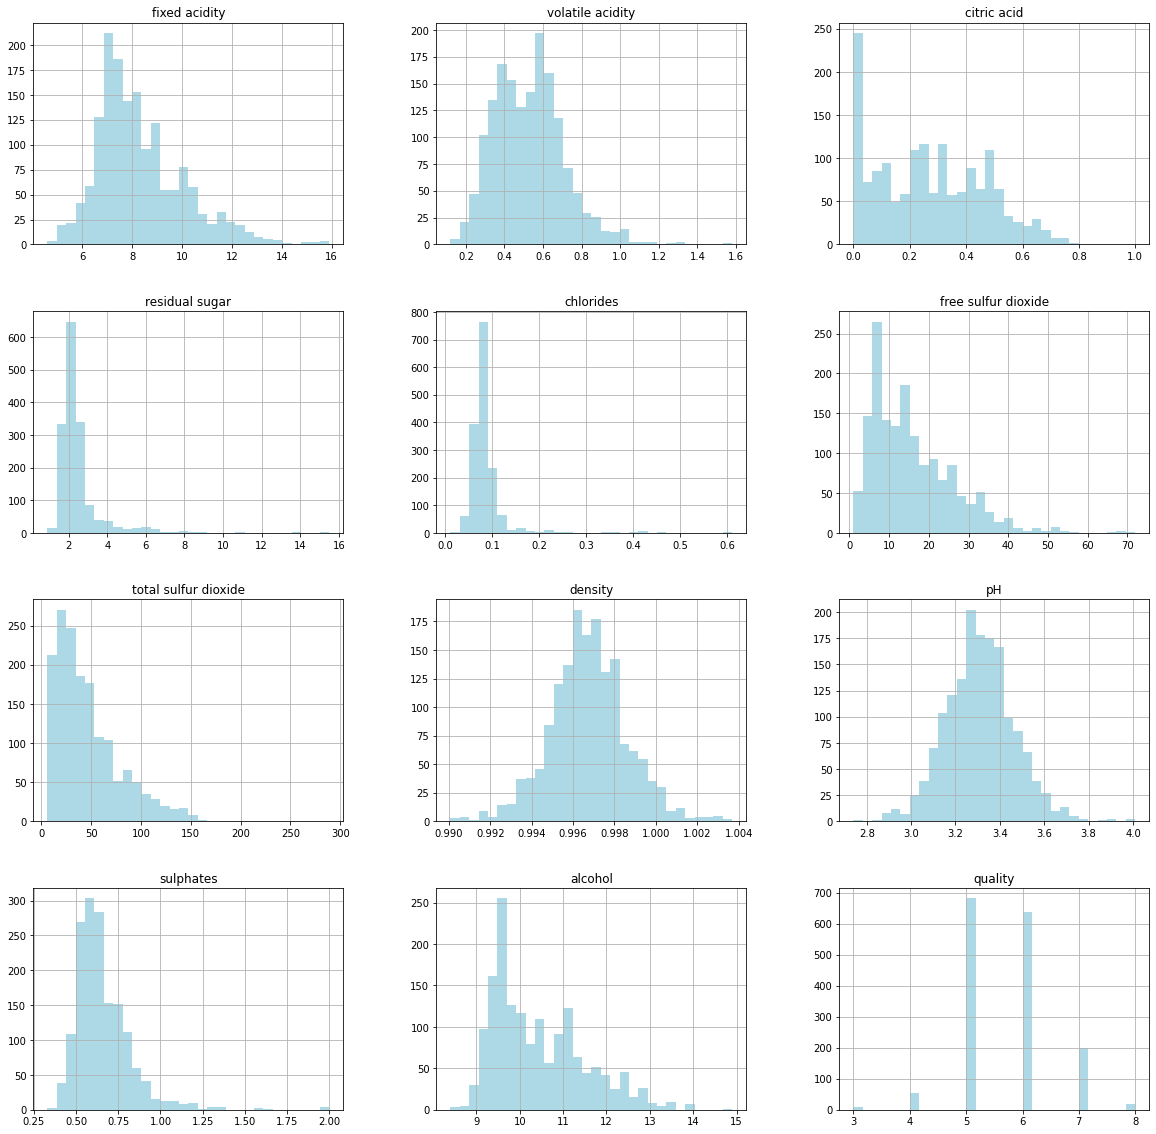

In [22]:
df.hist(figsize=(20,20),grid=True,layout=(4,3),bins=30,color='lightblue')

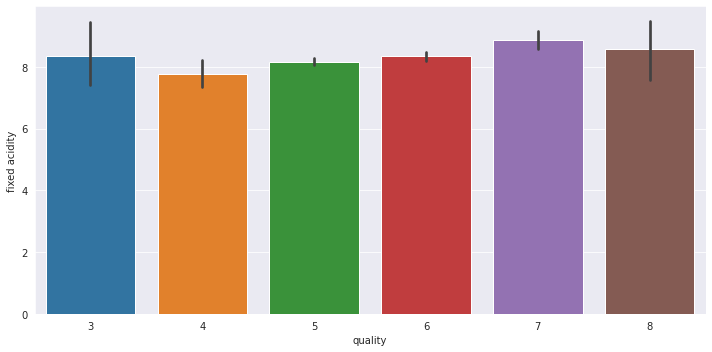

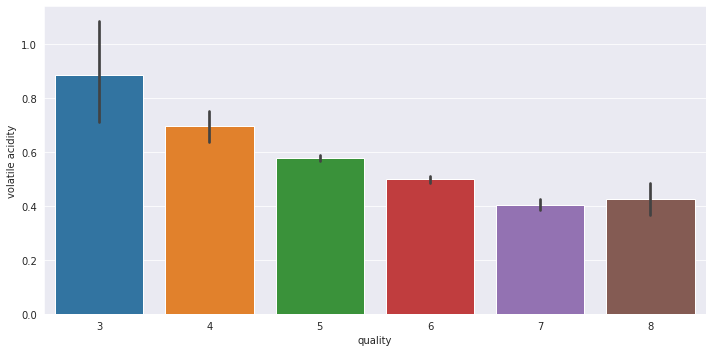

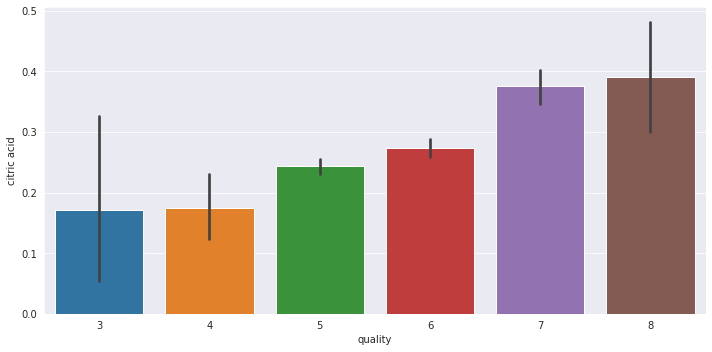

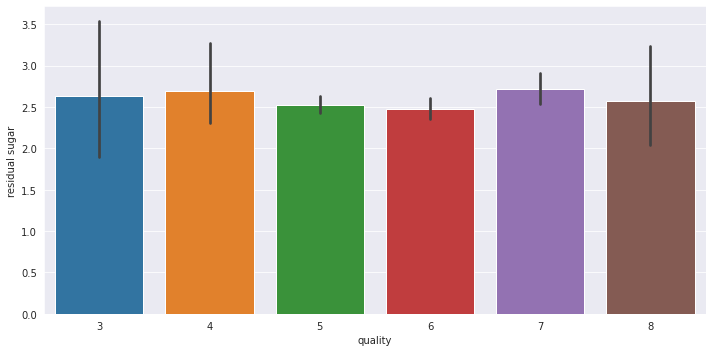

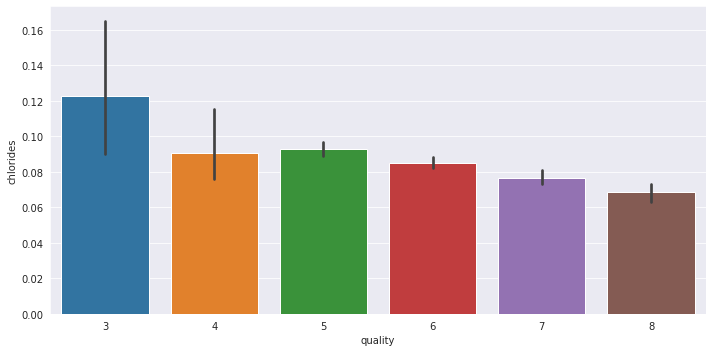

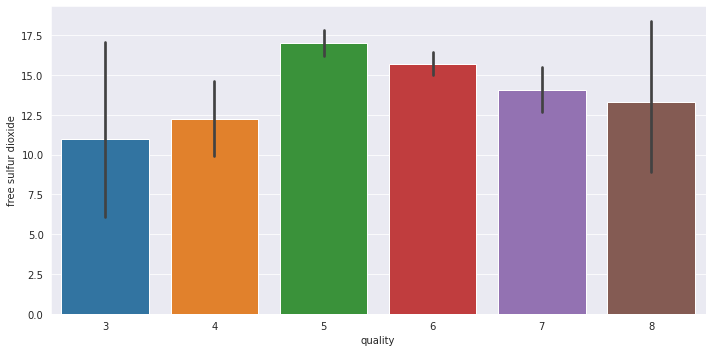

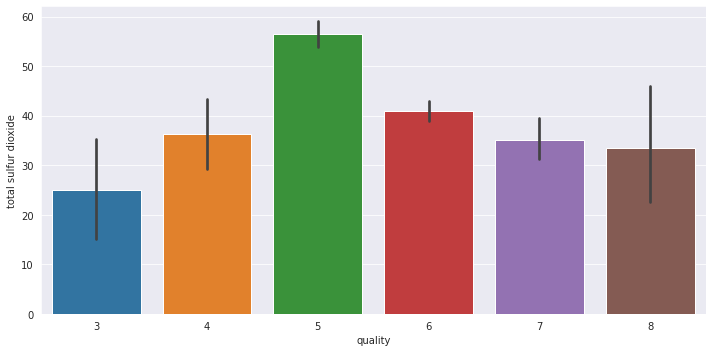

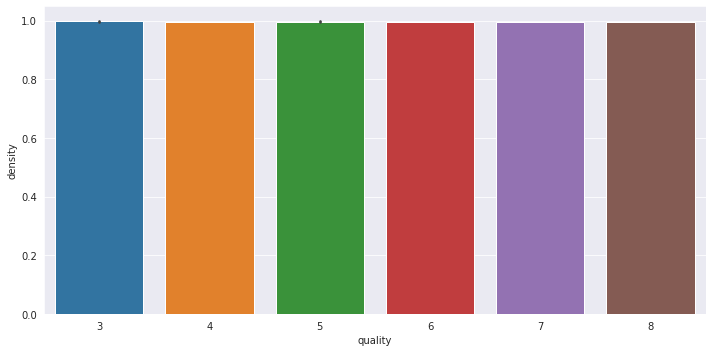

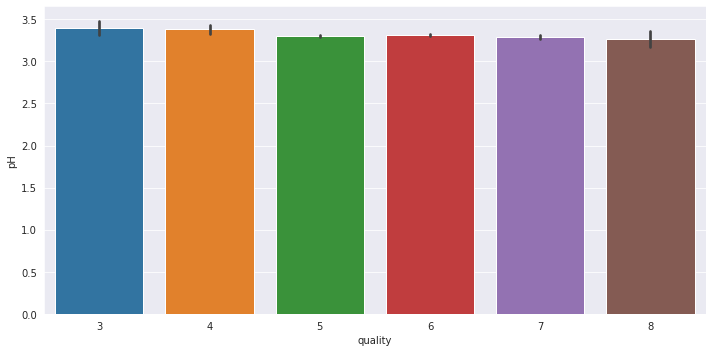

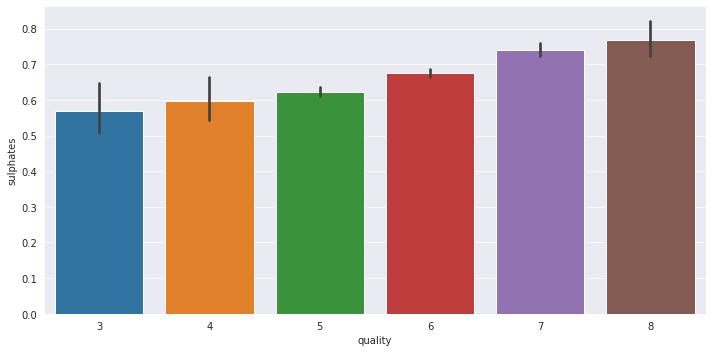

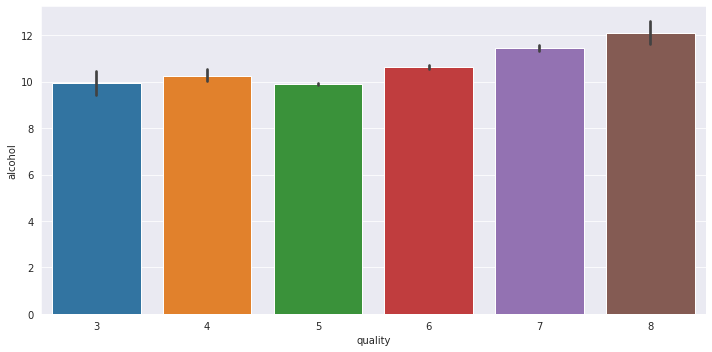

In [23]:
model=df.drop(['quality'],axis=1)
models=model.columns.values
sns.set_style("darkgrid")
for i in models:
    plt.subplots(figsize=(10,5))
    sns.barplot(x='quality',y=i,data=df,)
    plt.tight_layout()

In [24]:
df['quality']=np.where(df['quality']>6 ,'Good','Not Good')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Not Good
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Not Good
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Not Good


In [25]:
from sklearn.preprocessing import LabelEncoder
df['quality'] = LabelEncoder().fit_transform(df['quality'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


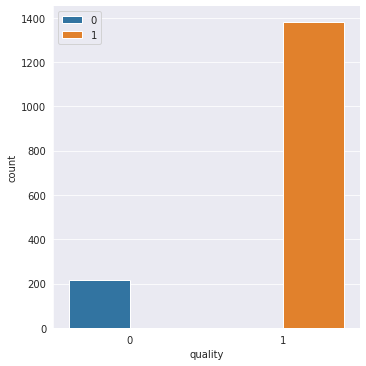

In [26]:
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()

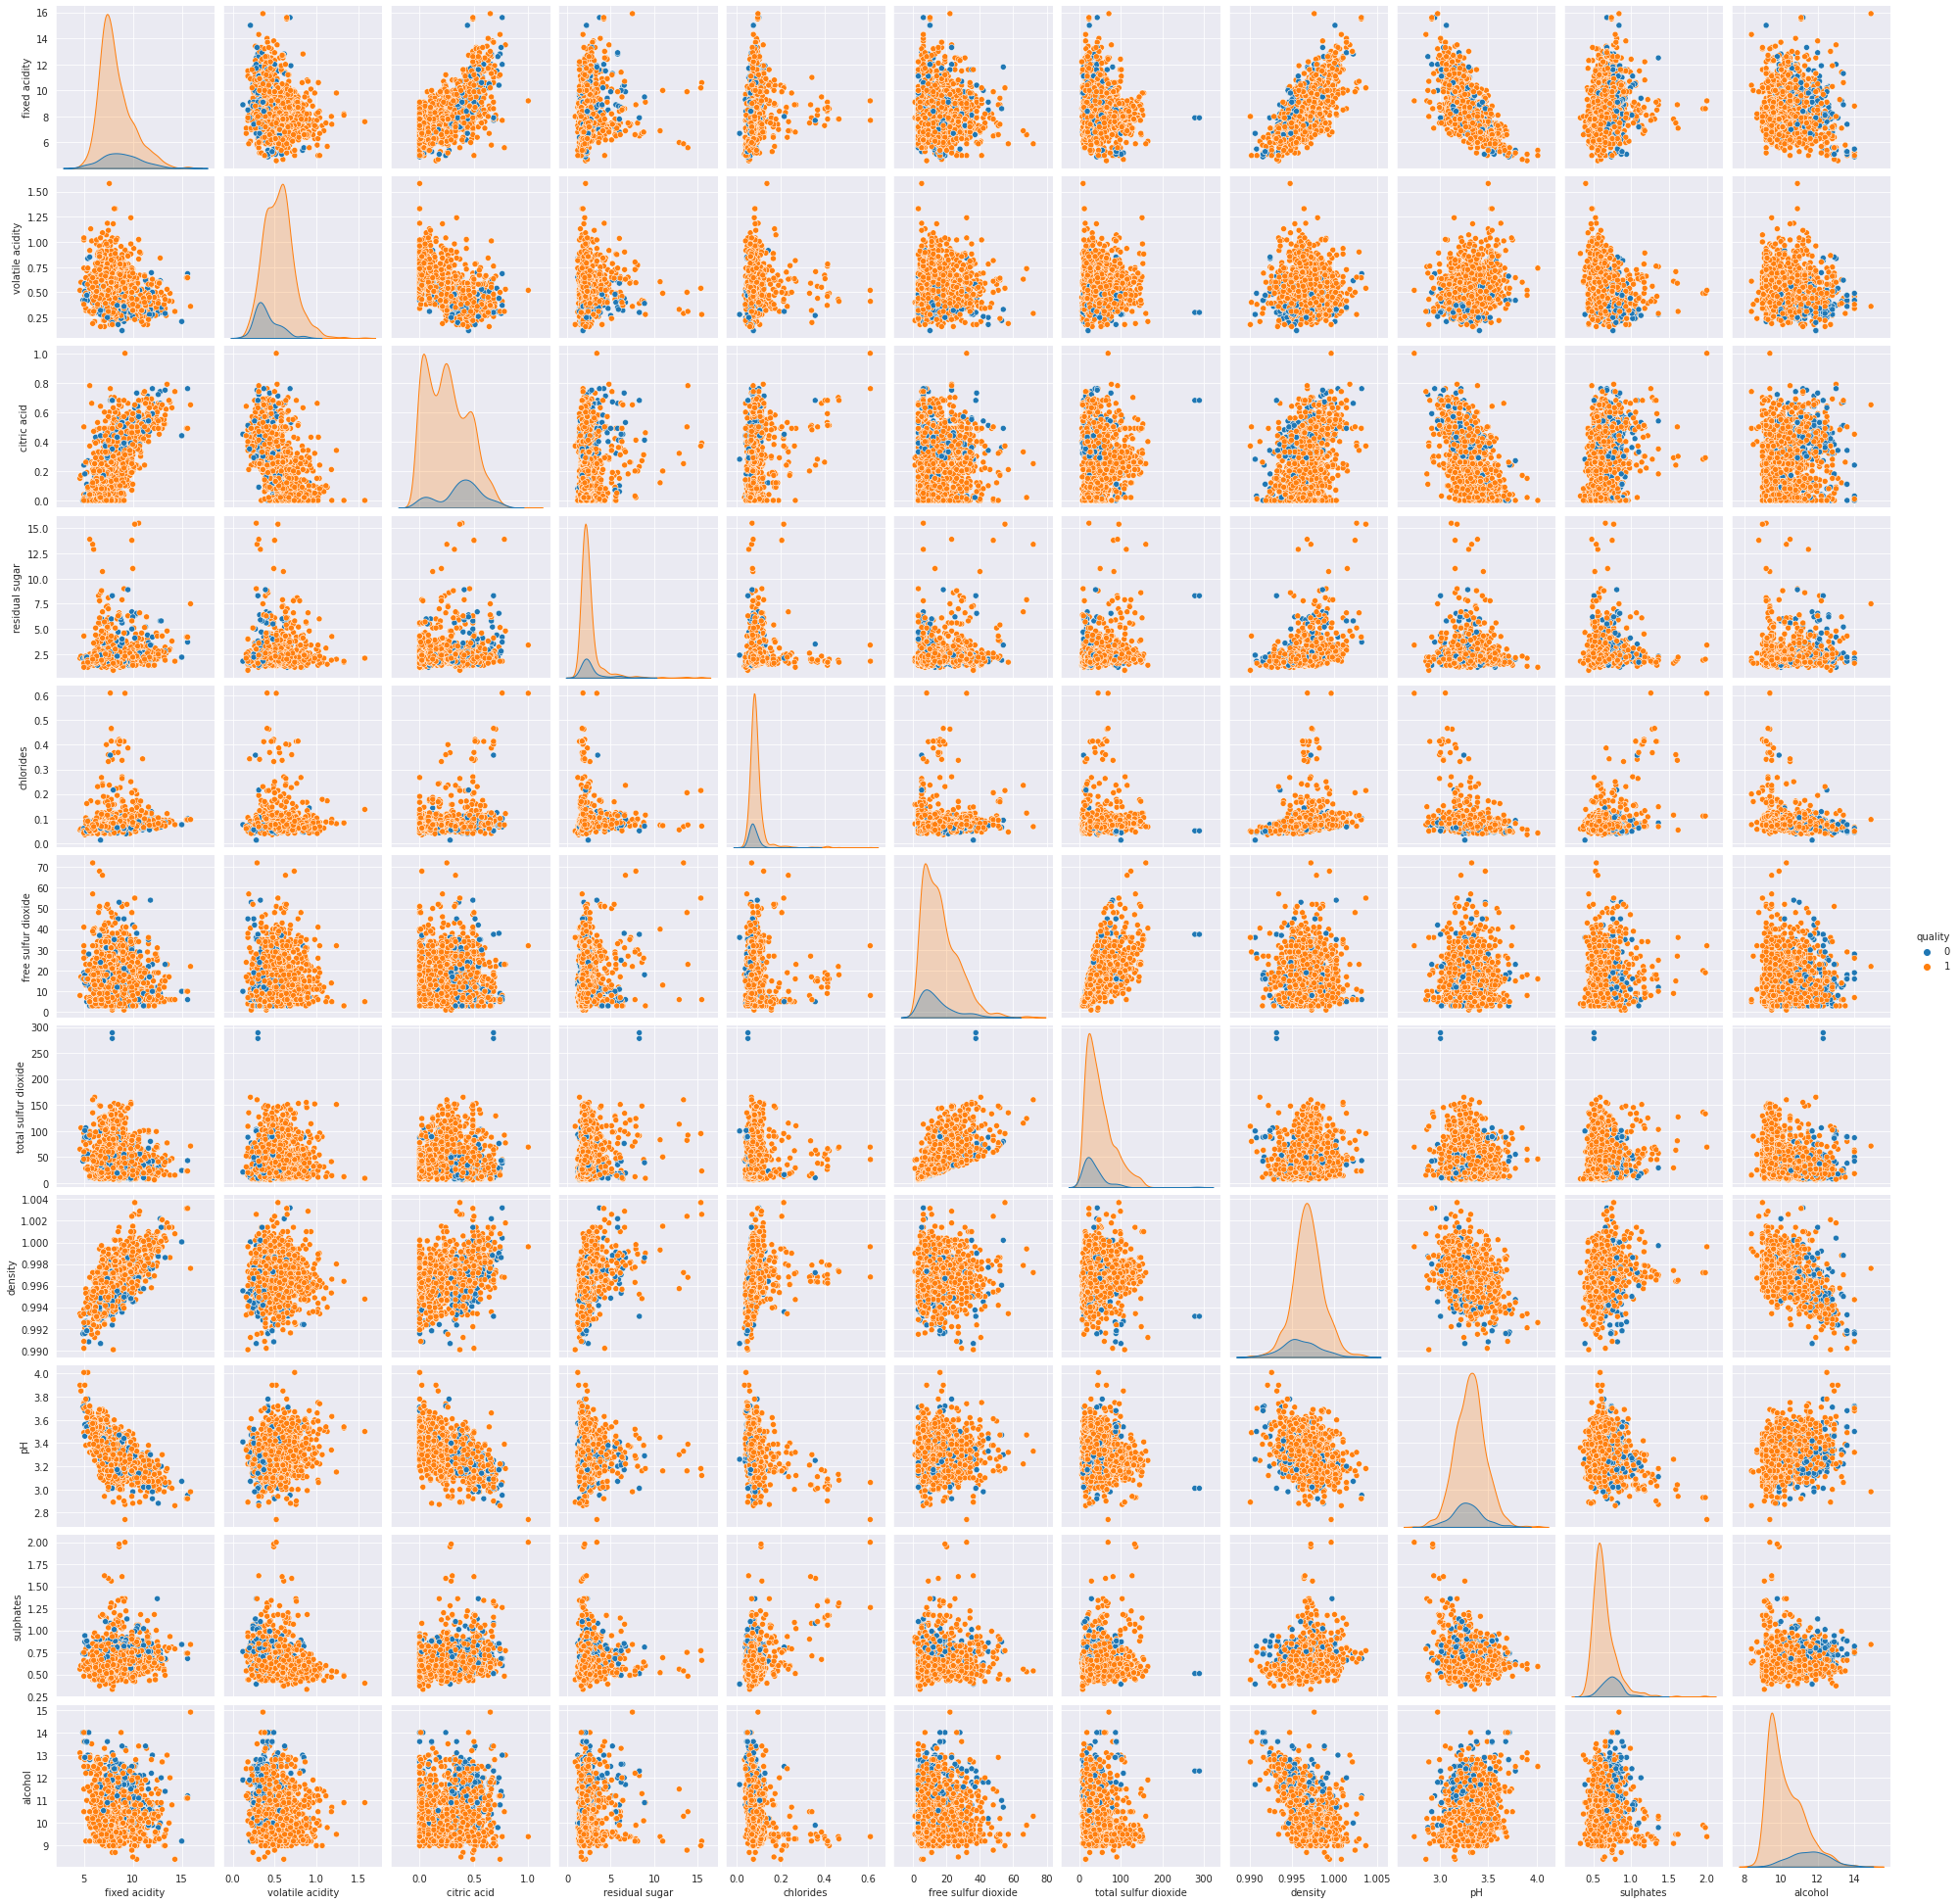

In [27]:
sns.pairplot(df,hue='quality',kind='scatter')

In [28]:
corr=df.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,-0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,0.27
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,-0.21
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,-0.05
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,0.10
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,0.07
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,0.14
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,0.15
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,-0.20


(12.5, -0.5)

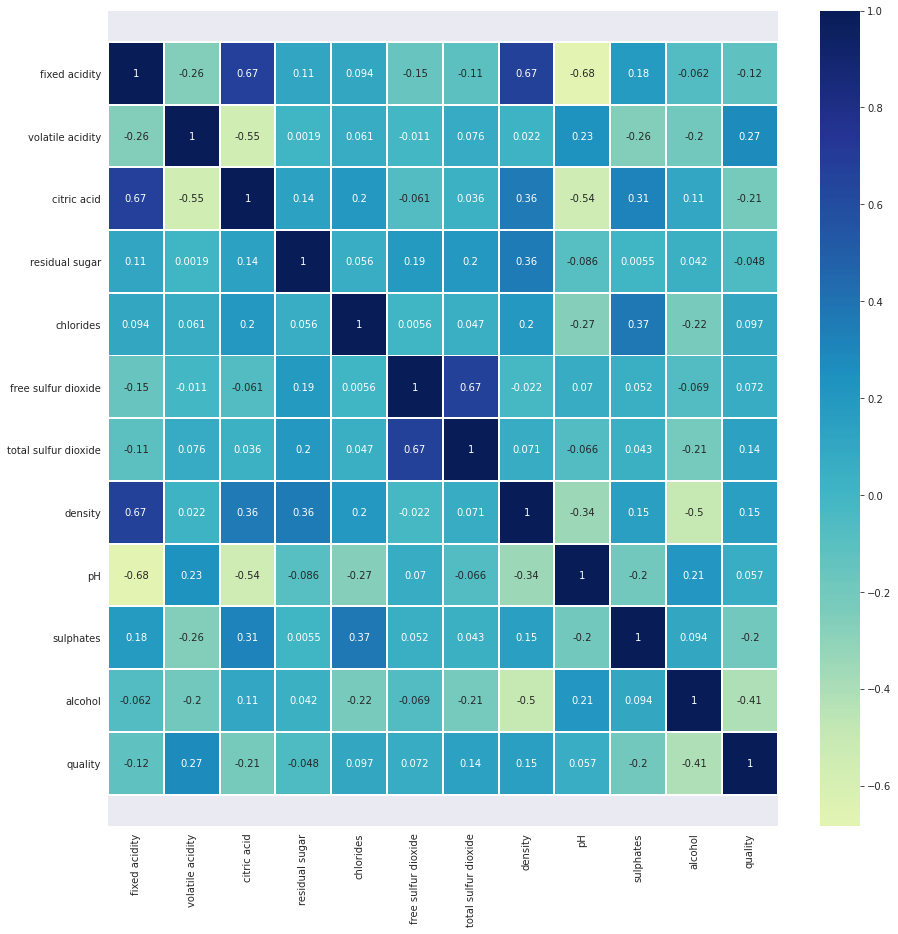

In [29]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [30]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -2.129363
dtype: float64

In [31]:
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [32]:
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                -2.129363
dtype: float64

In [33]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(1599, 12)
(1487, 12)


fixed acidity               AxesSubplot(0.125,0.71587;0.227941x0.16413)
volatile acidity         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
citric acid              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
residual sugar             AxesSubplot(0.125,0.518913;0.227941x0.16413)
chlorides               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
free sulfur dioxide     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
total sulfur dioxide       AxesSubplot(0.125,0.321957;0.227941x0.16413)
density                 AxesSubplot(0.398529,0.321957;0.227941x0.16413)
pH                      AxesSubplot(0.672059,0.321957;0.227941x0.16413)
sulphates                     AxesSubplot(0.125,0.125;0.227941x0.16413)
alcohol                    AxesSubplot(0.398529,0.125;0.227941x0.16413)
quality                    AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

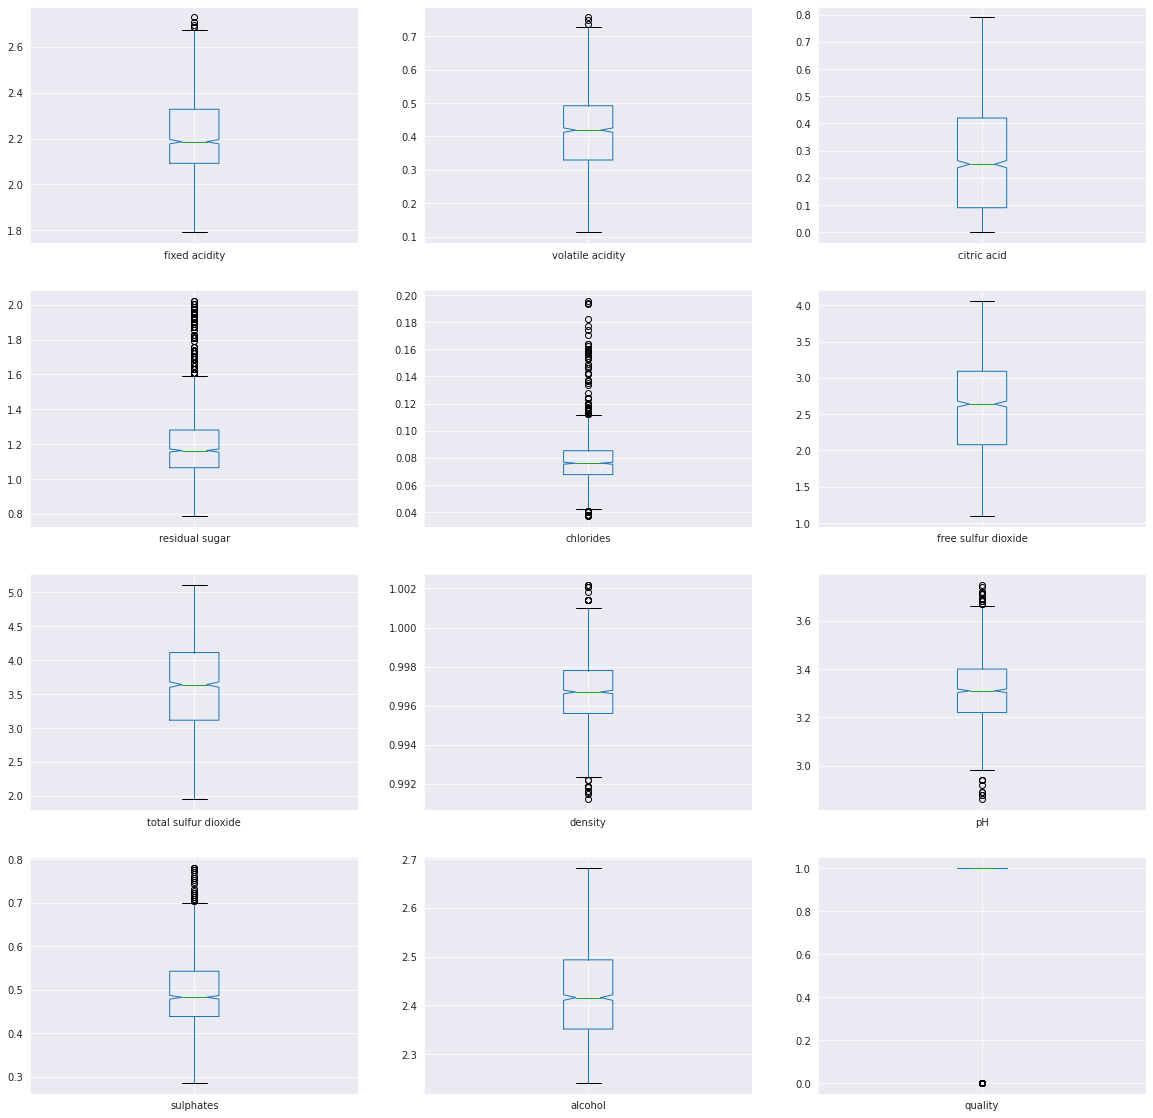

In [34]:
df_new.plot(kind='box', subplots=True, layout=(4,3),figsize=(20,20),grid=True,notch=True)

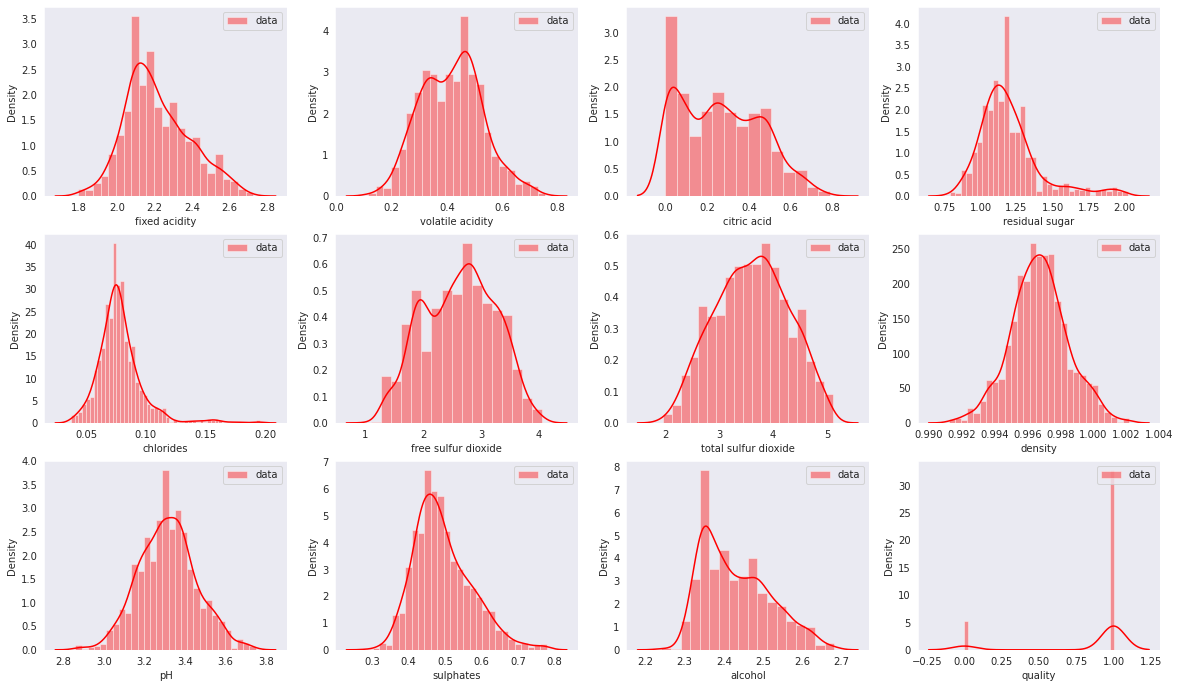

In [35]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [36]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['quality'],axis=1)
x1
print(x1.shape)

(1487, 11)


In [37]:
# Setting up the Target value in variable y.
y=df_new['quality']
y.shape

(1487,)

In [38]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.515050,1.019384,-1.383877,-0.623678,-0.262979,-0.232143,-0.079731,0.619044,1.370862,-0.626538,-1.025649
1,-0.245296,1.919324,-1.383877,0.392784,0.810288,1.035811,0.910470,0.045019,-0.807668,0.313365,-0.592579
2,-0.245296,1.329537,-1.175748,-0.016255,0.519727,0.239627,0.594137,0.159824,-0.386017,0.084838,-0.592579
3,1.649038,-1.518031,1.529931,-0.623678,-0.312284,0.432779,0.748507,0.733849,-1.088769,-0.464971,-0.592579
4,-0.515050,1.019384,-1.383877,-0.623678,-0.262979,-0.232143,-0.079731,0.619044,1.370862,-0.626538,-1.025649
...,...,...,...,...,...,...,...,...,...,...,...
1482,-1.408918,0.477287,-0.967618,-0.464307,0.422518,1.426781,0.294956,-1.045629,0.949211,-0.464971,0.128060
1483,-1.655707,0.193395,-0.863554,-0.160912,-0.957454,1.742251,0.510513,-0.919343,1.441137,0.903374,0.806105
1484,-1.328935,-0.040393,-0.707457,-0.016255,-0.262979,1.270482,0.156166,-0.563448,0.738385,0.831106,0.616431
1485,-1.655707,0.725305,-0.759489,-0.464307,-0.312284,1.426781,0.294956,-0.718435,1.792513,0.537847,-0.175261


In [39]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring,cv):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [40]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy',10)

{'criterion': 'gini', 'max_depth': 4, 'random_state': 12}


In [41]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy',10)

{'learning_rate': 0.01, 'n_estimators': 100}


In [42]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy',10)

{'n_neighbors': 17}


In [43]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy',10)

{'gamma': 0.001, 'random_state': 1}


In [44]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy',10)

{'C': 0.1}


In [45]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy',10)

{'max_features': 'log2', 'n_estimators': 700}


In [46]:
#     Grid Search for AdaBoostClassifier
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy',10)

{'n_estimators': 500}


In [47]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=11)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.01)
DT=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=12)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=1,n_estimators=500)
RF=RandomForestClassifier(max_features= 'auto', n_estimators= 700,)
AD=AdaBoostClassifier(n_estimators=200,)

In [48]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [49]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  90 is: 0.9032258064516129


Learning Score :  0.8869955156950673
Accuracy Score :  0.9032258064516129
Cross Val Score :  0.8742608380192273
roc auc score :  0.7460142935678944


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60        51
           1       0.93      0.96      0.94       321

    accuracy                           0.90       372
   macro avg       0.81      0.75      0.77       372
weighted avg       0.90      0.90      0.90       372



Confusion Matrix:
 [[ 27  24]
 [ 12 309]]





*************************** SVC *****************************


SVC(C=1.0, break_ties=False, cache_si

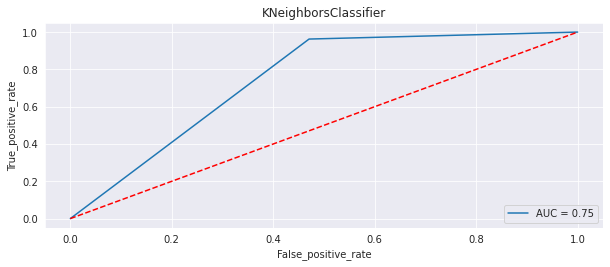

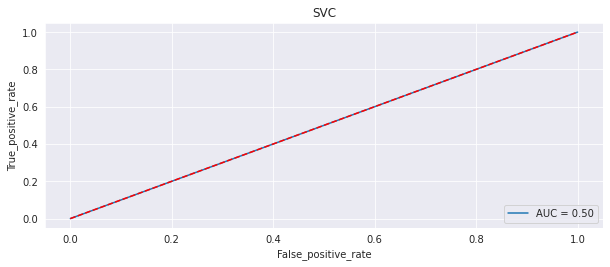

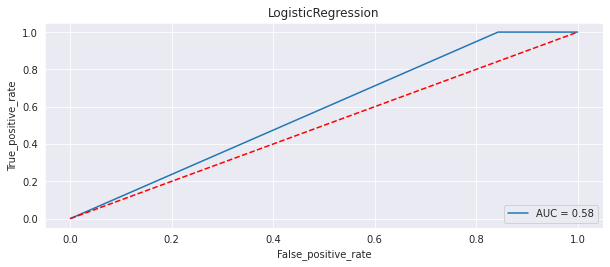

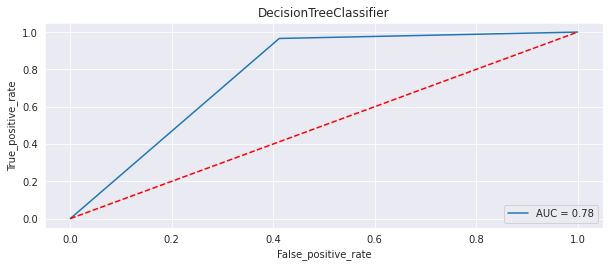

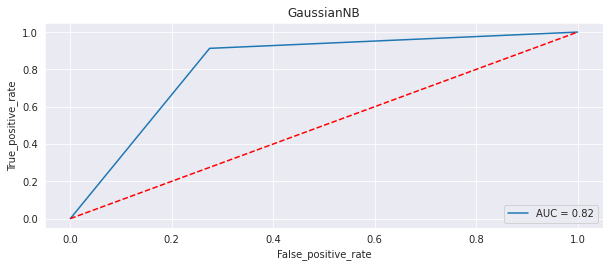

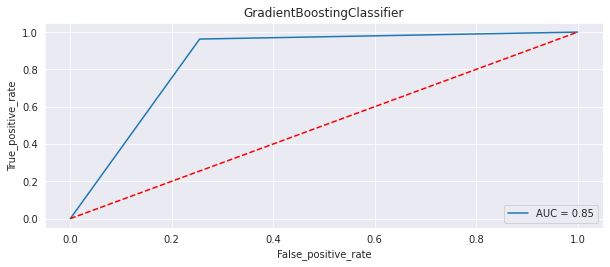

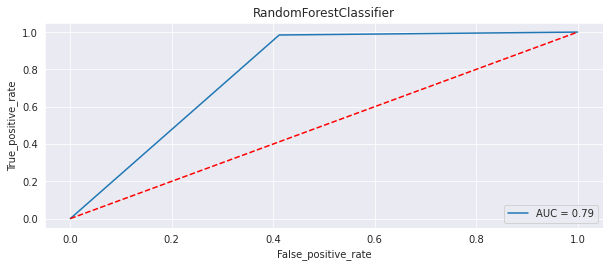

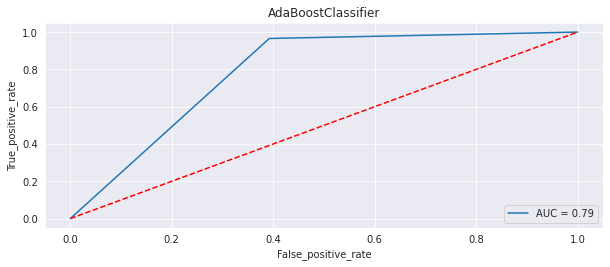

In [50]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    #................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [51]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #'Roc_Auc_curve':rocscore
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,88.699552,90.322581,87.426084,74.601429
1,SVC,86.457399,86.290323,86.415745,50.000000
2,LogisticRegression,86.995516,88.440860,87.559859,57.843137
3,DecisionTreeClassifier,91.479821,91.397849,88.703065,77.698369
4,GaussianNB,85.919283,88.709677,84.739706,81.913139
5,GradientBoostingClassifier,100.000000,93.279570,87.494558,85.385743
6,RandomForestClassifier,100.000000,93.010753,87.962997,78.632949
7,AdaBoostClassifier,97.309417,91.666667,86.823417,78.678761


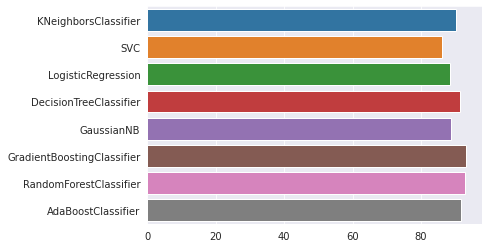

In [52]:
sns.barplot(y=Model,x=Acc_score,)


In [53]:
# Using GradientBoostingClassifier for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=.25,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=1,n_estimators=500)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
gbcpred=gbc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,gbcpred))
print('Confusion Matrix:',confusion_matrix(y_test,gbcpred))
print('Classification Report:',classification_report(y_test,gbcpred))

Accuracy Score: 0.9301075268817204
Confusion Matrix: [[ 38  13]
 [ 13 308]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.75      0.75        51
           1       0.96      0.96      0.96       321

    accuracy                           0.93       372
   macro avg       0.85      0.85      0.85       372
weighted avg       0.93      0.93      0.93       372



(2.5, -0.5)

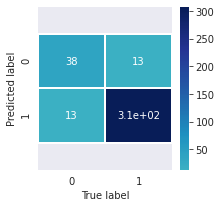

In [54]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, gbcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [55]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=gbcpred
test
# On the lest side values are those which are taken by machine for test...

,quality,Predicted values
1489,1,1
47,1,1
1454,1,1
380,1,1
1195,1,1
...,...,...
315,1,1
1566,1,1
1011,1,1
998,1,1


In [56]:
test.to_csv('Project_5_Red_wine_quality.csv')

In [57]:
from sklearn.externals import joblib
joblib.dump(gbc,'Project_5_Red_wine_quality.pkl')

['Project_5_Red_wine_quality.pkl']